In [4]:
import numpy as np
import matplotlib.pyplot as plt
from graphstats import *
from scipy.stats import norm

In [23]:
def decision_boundary(pi1, mu1, mu2, s1, s2):
    if s1 != s2:
        var1 = s1**2
        var2 = s2**2

        neg_b = mu2*var1 - mu1*var2
        disc1 = (mu2*var1 - mu1*var2)**2
        disc2 = (var1 - var2)*(mu2**2 * var1 - mu1**2 * var2 + 2*var1*var2*np.log(pi1*s2/((1 - pi1)*s1)))
        disc = disc1 - disc2
        sqrt_disc = np.sqrt(disc)

        a = var1 - var2
        print(neg_b, disc, a)

        x_plus = (neg_b + sqrt_disc)/a
        x_minus = (neg_b - sqrt_disc)/a
        

        return x_minus, x_plus
    else:
        num = mu2**2 - mu1**2 + 2*s1*np.log(pi1/(1 - pi1))
        den = 2*(mu2 - mu1)
        
        print(num, den)
        return num/den

In [24]:
# List of number of nodes
n = 150

# The number of seeds = int(n*seed_ratio)
seed_ratio = 0.1

# Class 1 prior
pi1 = 0.5

# Class 2 prior
pi2 = 1 - pi1
pi = np.array([pi1, pi2])

# Setting up B matrix
p = 0.55
q = 0.45

B = np.array([[p**2, p*q], [p*q, q**2]])

# Hard coding the maximum embedding dimension
max_dim = 1

# Setting the edge weight distribution parameters
mu1 = 5
mu2 = 10
scale1 = 1
scale2 = 1
means = np.array([[mu1, mu2], [mu2, mu1]])
scales = np.array([[scale1, scale2], [scale2, scale1]])

# ni = The number of training data for block i
n1 = int(np.round(n*seed_ratio*pi[0]))
n2 = int(np.round(n*seed_ratio*(1 - pi[0])))

# Find the total number of training data
ns  = n1 + n2

# Array of indices corresponding to training data
seeds1 = np.arange(0, n1)
seeds2 = np.arange(int(np.round(n*pi[0])), int(np.round(n*pi[0])) + n2)
all_seeds = np.concatenate((seeds1, seeds2))

# Labels for the training data
labels1 = np.zeros(len(seeds1))
labels2 = np.ones(len(seeds2))
seed_labels = np.concatenate((labels1, labels2))

# Ground truth
all_labels = np.concatenate((np.zeros(int(np.round(n*pi[0]))), np.ones(int(np.round(n*pi[1])))))

# Generate an adjacency matrix with n nodes
# class priors = pis
# block adjacency probabilities given by B
# weighted = True
# weight distribution = normal/gaussian with means = means and scales = scales
A = adj_matrix(n, pi, B, True, dist = "normal", means = means, scales = scales, acorn = 23)

C = strip_weights(A)
V_C, U_C = adj_spectral_embedding(C, max_dim = 2)
X_hat_C = V_C[:, :1].copy()

In [25]:
mu1 = np.mean(X_hat_C[:int((n/2)*seed_ratio)])
scale1 = np.std(X_hat_C[:int((n/2)*seed_ratio)], ddof = 1)

mu2 = np.mean(X_hat_C[int(n/2):int( n/2 + (n/2)*seed_ratio)])
scale2 = np.std(X_hat_C[int(n/2):int( n/2 + (n/2)*seed_ratio)], ddof = 1)

xs = np.arange(0, 1, step = 0.001)
mu1, scale1, mu2, scale2

(0.5494430017743899,
 0.061543309938866836,
 0.4472892366125599,
 0.06559692475874022)

-0.0006700860379069713 1.7114537097157366e-07 -0.0005153775395724007
class 1 misclassification rate: 0.2962962962962963
class 2 misclassification rate: 0.23703703703703705


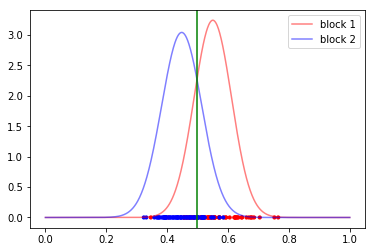

In [26]:
new_labels = []
for i in range(n):
    if all_labels[i] == 0:
        new_labels.append('r')
    else:
        new_labels.append('b')
        
x_minus1, x_plus1 = decision_boundary(0.5, mu1, mu2, scale1, scale2)
misclassification_rate_1 = np.sum(X_hat_C[int((n/2)*seed_ratio): int(n/2)] < x_plus1)
print("class 1 misclassification rate:", misclassification_rate_1/(n/2 - n*seed_ratio/2))

misclassification_rate_2 = np.sum(X_hat_C[int((n/2)*seed_ratio) + int(n/2):] > x_plus1)
print("class 2 misclassification rate:", misclassification_rate_2/(n/2 - n*seed_ratio/2))

fig, ax = plt.subplots(1,1)
ax.scatter(X_hat_C, np.zeros(n), c = new_labels, s = 10)
ax.plot(xs, 0.5*norm.pdf(xs, mu1, scale1), c = 'r', label = 'block 1', alpha = 0.5)
ax.plot(xs, 0.5*norm.pdf(xs, mu2, scale2), c = 'b', label = 'block 2', alpha = 0.5)
ax.axvline(x = x_plus1, c = 'g')
ax.legend(loc = 'upper right')

plt.savefig('ordered_original.png')

-0.0006700860379069713 1.8960098909430906e-07 -0.0005153775395724007
class 1 misclassification rate: 0.07407407407407407
class 2 misclassification rate: 0.42962962962962964


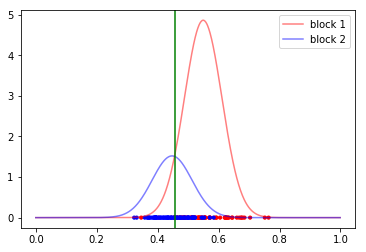

In [27]:
x_minus1, x_plus1 = decision_boundary(0.75, mu1, mu2, scale1, scale2)

misclassification_rate_1 = np.sum(X_hat_C[int((n/2)*seed_ratio): int(n/2)] < x_plus1)
print("class 1 misclassification rate:", misclassification_rate_1/(n/2 - n*seed_ratio/2))

misclassification_rate_2 = np.sum(X_hat_C[int((n/2)*seed_ratio) + int(n/2):] > x_plus1)
print("class 2 misclassification rate:", misclassification_rate_2/(n/2 - n*seed_ratio/2))

fig, ax = plt.subplots(1,1)
ax.scatter(X_hat_C, np.zeros(n), c = new_labels, s = 10)
ax.plot(xs, 0.75*norm.pdf(xs, mu1, scale1), c = 'r', label = 'block 1', alpha = 0.5)
ax.plot(xs, 0.25*norm.pdf(xs, mu2, scale2), c = 'b', label = 'block 2', alpha = 0.5)
ax.axvline(x = x_plus1, c = 'g')
ax.legend(loc = 'upper right')

plt.savefig('ordered_block1.png')

-0.0006700860379069713 1.5268975284883827e-07 -0.0005153775395724007
class 1 misclassification rate: 0.5185185185185185
class 2 misclassification rate: 0.05925925925925926


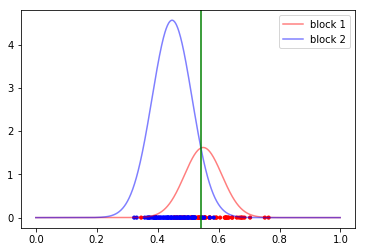

In [28]:
x_minus1, x_plus1 = decision_boundary(0.25, mu1, mu2, scale1, scale2)

misclassification_rate_1 = np.sum(X_hat_C[int((n/2)*seed_ratio): int(n/2)] < x_plus1)
print("class 1 misclassification rate:", misclassification_rate_1/(n/2 - n*seed_ratio/2))

misclassification_rate_2 = np.sum(X_hat_C[int((n/2)*seed_ratio) + int(n/2):] > x_plus1)
print("class 2 misclassification rate:", misclassification_rate_2/(n/2 - n*seed_ratio/2))

fig, ax = plt.subplots(1,1)
ax.scatter(X_hat_C, np.zeros(n), c = new_labels, s = 10)
ax.plot(xs, 0.25*norm.pdf(xs, mu1, scale1), c = 'r', label = 'block 1', alpha = 0.5)
ax.plot(xs, 0.75*norm.pdf(xs, mu2, scale2), c = 'b', label = 'block 2', alpha = 0.5)
ax.axvline(x = x_plus1, c = 'g')
ax.legend(loc = 'upper right')
plt.savefig('ordered_block2.png')

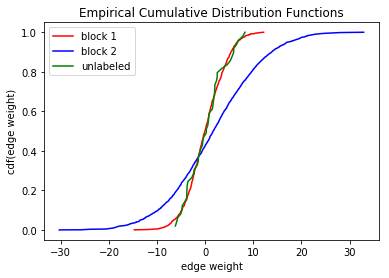

In [29]:
n = 100
mu1 = 0
mu2 = 2
scale1 = 4
scale2 = 9
pi = [0.5, 0.5]

n1 = int(n*0.5)
n2 = int(n*0.5)
B = np.array([[1,1], [1,1]])

means = np.array([[mu1, mu2], [mu2, mu1]])
scales = np.array([[scale1, scale2], [scale2, scale1]])

seeds1 = np.arange(0, n1)
seeds2 = np.arange(int(np.round(n*pi[0])), int(np.round(n*pi[0])) + n2)
all_seeds = np.concatenate((seeds1, seeds2))

labels1 = np.zeros(len(seeds1))
labels2 = np.ones(len(seeds2))
seed_labels = np.concatenate((labels1, labels2))

all_labels = np.concatenate((np.zeros(int(np.round(n*pi[0]))), np.ones(int(np.round(n*pi[1])))))
A = adj_matrix(100, pi, B, True, dist = "normal", means = means, scales = scales, acorn = 0)
seed_weights = get_weights(A, all_seeds, seed_labels)
unlabeled_weight = get_weights(A, all_seeds, seed_labels, 35)

class1 = seed_weights[0][0]
class2 = seed_weights[1][0]

class1_ord = np.sort(class1)
class2_ord = np.sort(class2)

ecdf1 = np.arange(1, len(class1_ord) + 1)/len(class1_ord)
ecdf2 = np.arange(1, len(class2_ord) + 1)/len(class2_ord)

unlabeled_ord = np.sort(unlabeled_weight[0])
ecdfu = np.arange(1, len(unlabeled_ord) + 1)/len(unlabeled_ord)

min_ = min(min(unlabeled_ord), min(ecdf1), min(ecdf2))
max_ = max(max(unlabeled_ord), max(ecdf1), max(ecdf2))

min(unlabeled_ord), min(ecdf1), min(ecdf2)

fig, ax = plt.subplots(1,1)
ax.plot(class1_ord, ecdf1, label= 'block 1', c = 'r')
ax.plot(class2_ord, ecdf2, label = 'block 2', c = 'b')
ax.plot(unlabeled_ord, ecdfu, label = 'unlabeled', c = 'g')
ax.legend(loc = 'upper left')
ax.set_title('Empirical Cumulative Distribution Functions')
ax.set_xlabel('edge weight')
ax.set_ylabel('cdf(edge weight)')

plt.savefig('ecdf_example.png')

2.0 11.280741233108426 -1.25
2.0 5.101047109350308 -1.25
2.0 -1.078647014407811 -1.25


/mnt/c/Users/hhelm/virtualenvs/d3m/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.


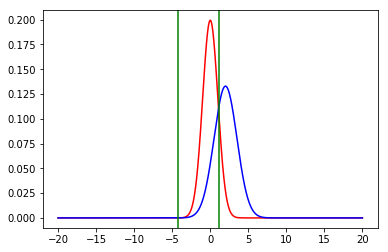

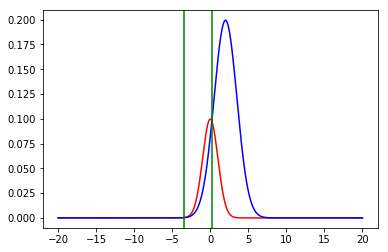

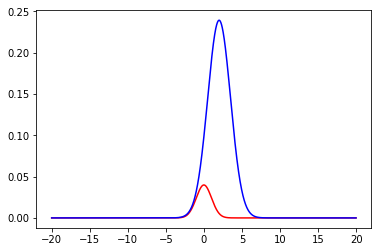

In [30]:
pi = 1 - np.array([0.5, 0.75, 0.9]) #, 0.99])
mu1 = 0
mu2 = 2
s1 = 1
s2 = 1.5

ls = ['-', '--', ':']

xs = np.arange(-20, 20, step = 0.01)

for i in range(len(pi)):
    fig, ax = plt.subplots(1,1)
    xm, xp = decision_boundary(pi[i], mu1, mu2, s1, s2)
    ax.plot(xs, pi[i]*norm.pdf(xs, mu1, s1), c = 'r')
    ax.plot(xs, (1 - pi[i])*norm.pdf(xs, mu2, s2), c = 'b')
    ax.axvline(x = xm, c = 'g')
    ax.axvline(x = xp, c = 'g')